<a href="https://colab.research.google.com/github/noeyhey/HUFS_Untructured-DM/blob/main/UnstructuredDM_0401.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 비정형데이터마이닝
#### 250401 5주차 실습
#### 딥러닝을 활용한 이미지 분류모델

In [ ]:
!pip install tensorflow

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

####**CNN 기본 아키텍처 기반 이미지 분류**

##### 데이터 불러오기

In [7]:
#데이터셋
(train, val), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

In [8]:
IMG_SIZE = 128

def format_example(image, label):
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0
  return image, label

train_ds = train.map(format_example).batch(32).shuffle(1000)
val_ds = val.map(format_example).batch(32)

##### 모델

In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid') # 이진 분류
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()
history = model.fit(train_ds, epochs=5, validation_data=val_ds)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.6385 - loss: 0.6836 - val_accuracy: 0.7444 - val_loss: 0.5234
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 29s 21ms/step - accuracy: 0.7734 - loss: 0.4728 - val_accuracy: 0.7736 - val_loss: 0.4822
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 36s 31ms/step - accuracy: 0.8374 - loss: 0.3622 - val_accuracy: 0.7724 - val_loss: 0.4914
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 0.9115 - loss: 0.2227 - val_accuracy: 0.7833 - val_loss: 0.5483
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.9608 - loss: 0.1061 - val_accuracy: 0.7805 - val_loss: 0.7432


##### 정확도 시각화

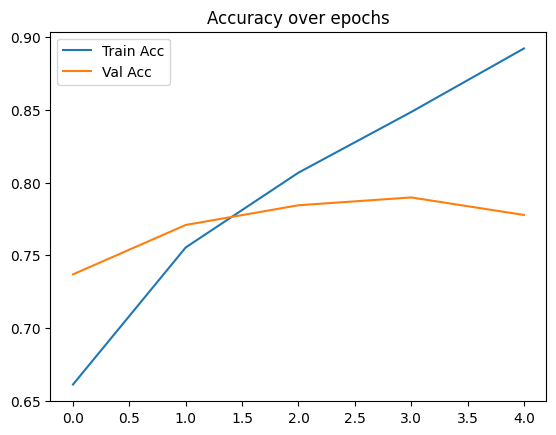

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy over epochs")
plt.show()

##### AlexNet

In [10]:
IMG_SIZE = 227 # AlexNet 227x227

train_ds2 = train.map(format_example).shuffle(1000).batch(32)
val_ds2 = val.map(format_example).batch(32)

def build_alexnet():
  model = models.Sequential([
    layers.InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, 3)),

    layers.Conv2D(96, kernel_size=11, strides=4, activation='relu'),
    layers.MaxPooling2D(pool_size=3, strides=2),

    layers.Conv2D(256, kernel_size=5, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=3, strides=2),

    layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),

    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')
  ])
  return model

In [11]:
model = build_alexnet()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,285,441 (222.34 MB)

 Trainable params: 58,285,441 (222.34 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(train_ds2, epochs=5, validation_data=val_ds2)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 62s 87ms/step - accuracy: 0.5076 - loss: 0.9605 - val_accuracy: 0.5099 - val_loss: 0.6930
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.5017 - loss: 0.6934 - val_accuracy: 0.5099 - val_loss: 0.6930
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 48s 79ms/step - accuracy: 0.5025 - loss: 0.6935 - val_accuracy: 0.5099 - val_loss: 0.6930
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.4981 - loss: 0.6935 - val_accuracy: 0.5099 - val_loss: 0.6931
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.5069 - loss: 0.6931 - val_accuracy: 0.5099 - val_loss: 0.6930


#### **전체 예측과 실제 라벨 수집**

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [14]:
y_true = []
y_pred = []

for images, labels in val_ds2:
    preds = model.predict(images)
    preds_cls = (preds > 0.5).astype(int)

    y_true.extend(labels.numpy())
    y_pred.extend(preds_cls.flatten())  # [0, 1, 1, 0, ...] 형태로

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━

혼동행렬 계산

In [15]:
cm = confusion_matrix(y_true, y_pred)

시각화

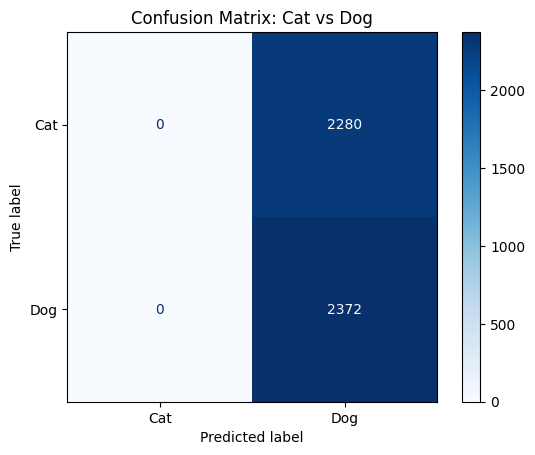

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Cat", "Dog"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Cat vs Dog")
plt.show()